In [557]:
# Version 3.0.1
# Title: Flow Distribution in a Doublet EGS
# Authors: Pranay Asai (UoU) & Robert Podgorney (INL)
# Edited by: Pranay Asai
# Date: 06/26/2021
# Updates:
#     1. Minor Corrections

## NOTE: The CSV file titled "testpheta.csv" must be in the same folder as this notebook to run

In [558]:
#      o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|
#                     |              |              |              |
#                     /              /              /              /
#                     \              \              \              /
#                     /              /              /              /
#                     |              |              |              |
#      o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|

#                 |----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----o
#                 |              |              |              |
#                 /              /              /              /
#                 \              \              \              \
#                 /              /              /              /
#                 |              |              |              |
#  o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|

In [288]:
import numpy as np  #Importing NumPy4
import math
import matplotlib.pyplot as plt
import random
from ipynb.fs.defs.FrictionFactors import * #Imports all the functions
import pandas as pd

In [289]:
import platform
is_windows = any(platform.win32_ver())
if is_windows==True:
    path=r'CustomPath'
else:
    path=r'/Users/willba/Desktop/Flowratestudy'

In [290]:
#For Fracture
NumberOfFractures=3
TotalWellLength=3227 #m, Length of the well
BasePermeability=1e-12 #m2, #Fracture base Permebility
FractureHeight=100 #m Fracture entrance length
FractureWidth=5.0 #m Fracture entrance pseudo width
BaseFractureLength=100 #m Height of fractures
Area_FractureEntrance=FractureHeight*FractureWidth #Area of fracture for the fluid to enter

#For Pipe
Diameter_InjectionWell=0.18#*(0.5/0.1524)   #m Diameter of the Injection Pipe
Diameter_ProductionWell=0.18#*(0.5/0.1524)  #m Diameter of the Production Pipe
Area_InjectionWell=math.pi*Diameter_InjectionWell**2*0.25 #meters sq.
Area_ProductionWell=math.pi*Diameter_InjectionWell**2*0.25 #meters sq.
DensityWater=1000 #kg/s
e=0.015/1000  #roughness in m
BaseInjectionWellSection=TotalWellLength/NumberOfFractures #m Length of Inj pipe section
BaseProductionWellSection=TotalWellLength/NumberOfFractures #m Length of Prod pipe section

#For Perforation
LengthOfPerfZone=1 #m, length og each perf zone
Cd=0.75 #Discharge Coefficient
NumberOfPerfPerMeter=50 # Number of perforations per meter
NumberOfPerfs=LengthOfPerfZone*NumberOfPerfPerMeter #Number of Perforations
BaseDiameter_InjectionPerforation=0.003175*3#*0.5 #m, Diameter of perforations
BaseDiameter_ProductionPerforation=0.003175*3#*0.5 #m, Diameter of perforations

In [291]:
#Initialization
Pressure_Injection=np.zeros(NumberOfFractures+1)
Pressure_Production=np.zeros(NumberOfFractures+1)
Pressure_Fracture=np.zeros(NumberOfFractures)
Flowrate_Fracture=np.zeros(NumberOfFractures)
FractureLength=np.zeros(NumberOfFractures)
InjectionWellSection=np.zeros(NumberOfFractures+1)
ProductionWellSection=np.zeros(NumberOfFractures+1)
Permeability_Fracture=np.zeros(NumberOfFractures)
Diameter_InjectionPerforation=np.zeros(NumberOfFractures)
Diameter_ProductionPerforation=np.zeros(NumberOfFractures)
WellAngle=0

#NOTE: 1800 data points were taken, 5 rows of data including well angle, fracture 1,2 and 3 flow distribution,
# and pressure drop(PSI)
storage = np.zeros((1800,5))

In [292]:
#Flow Rate and Pressure
Flowrate_Initial=50 #kg/s
Pressure_Injection[0]=3e7


In [293]:
#CONTROL VARIABLES

#Turn on pressure drop in injection well
InjectionWellActivate=1 #if 1, the pressure drop in the well is on
#Turn on pressure drop in production well
ProductionWellActivate=1 #if 1, the pressure drop in the well is on
#Activate Perforation
ActivateInjectionPerforations=1  #If 0, perforation pressure drop is zero.
#activate production well perforation
ActivateProductionPerforations=0

#Variable Permeablity
# If 0, All fractures have same permeability
# If 1, The permeability values are assigned at random with respect to the base value
# If 2, Option to input custom permeability values.
VariablePermeability=0

# NOTE: Import fracture spacing from testpheta CSV file or the code will not run
pwo = pd.read_csv('testpheta.csv')
pwo2 = pd.DataFrame(pwo)
dls = pwo2.to_numpy()
d1 = dls[0:1800,0]
print(len(d1))
#dl = 0
#ORIENTATION OF WELLS
# If 1, The wells are Parallel
# If 2, The wells are Anti-Parallel
# If 3, The wells are Non-Parallel  # Input the Difference between first and last fracture
WellsOrientation=3

if WellsOrientation==3:
    #d1=float(input("Enter the difference between the first and last fracture size: "))
    #print(dl)
    #dl = 7.534760914
    BaseFractureLength=BaseFractureLength-d1[0]/2
    WellAngle=math.atan((d1[0]/2)/((NumberOfFractures-1)*BaseInjectionWellSection)) #Angle of Injection well
    print(math.degrees(WellAngle)*2)



#Adaptive Perforation (Still in test phase)
# If 0, Adaptive Perforations are turned off
# If 1, Adaptive Perforations are turned on
# If 2, Custom input for Perforations
AdaptivePerf=0

1800
0.10033542524494841


In [294]:
#Calculate Fracture Permeability
#Function is defined as:
# var1*BasePermeability*(10^var2), where Var1 varies from 1 to 10 and Var2 varies from -1, 0 or 1, at random.
if VariablePermeability!=2:
    Permeability_Fracture=FracturePermeability(NumberOfFractures,BasePermeability,FractureWidth,FractureHeight,VariablePermeability)
else:
    for i in range(NumberOfFractures):
        #Define any custom function
        if i%2==0:
            Permeability_Fracture[i]=BasePermeability/2
        else:
            Permeability_Fracture[i]=BasePermeability

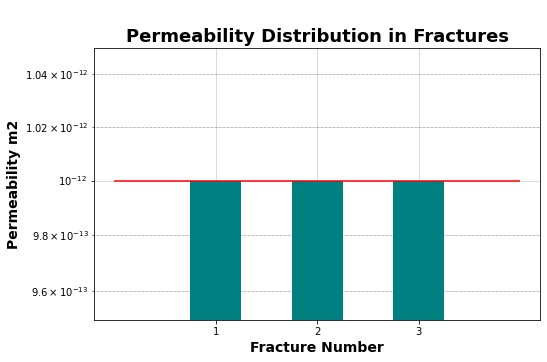

In [295]:
pplots(Permeability_Fracture,NumberOfFractures,"Permeability","yes",path)

In [296]:
#Calculate Perforations
Diameter_InjectionPerforation=AdaptivePerforation(WellsOrientation,VariablePermeability,AdaptivePerf,NumberOfFractures,Diameter_InjectionPerforation,BaseDiameter_InjectionPerforation,Permeability_Fracture)
Diameter_ProductionPerforation=AdaptivePerforation(WellsOrientation,VariablePermeability,AdaptivePerf,NumberOfFractures,Diameter_ProductionPerforation,BaseDiameter_ProductionPerforation,Permeability_Fracture)
print(Diameter_InjectionPerforation)
print(Diameter_ProductionPerforation)
print(Area_FractureEntrance)

[0.009525 0.009525 0.009525]
[0.009525 0.009525 0.009525]
500.0


In [297]:
#Define a custom fucntion for Perforation diameters
if AdaptivePerf==2:
    for i in range(NumberOfFractures-1):
        #Define any custom function
        Diameter_InjectionPerforation[i]=BaseDiameter_InjectionPerforation
        Diameter_ProductionPerforation[i]=BaseDiameter_InjectionPerforation
    Diameter_InjectionPerforation[2] = 0.0076
    Diameter_ProductionPerforation[2] = 0.0076
print(Diameter_InjectionPerforation)
print(Diameter_ProductionPerforation)


[0.009525 0.009525 0.009525]
[0.009525 0.009525 0.009525]


In [ ]:
counter = 0

while counter <= (len(d1)-1):
    
    Pressure_Injection=np.zeros(NumberOfFractures+1)
    Pressure_Production=np.zeros(NumberOfFractures+1)
    Pressure_Fracture=np.zeros(NumberOfFractures)
    Flowrate_Fracture=np.zeros(NumberOfFractures)
    Pressure_Injection[0]=3e7
    MaxIterations=1000 #number of iterations
    #mmax=10000 #max number of iterations
    Tolerance=1e-6 #Tolerance
    FactorTest = 1000 #NumberOfFractures*FractureHeight
    Flowrate_Update=np.zeros(NumberOfFractures)
    Flowrate_Frac1=np.zeros(MaxIterations)
    Flowrate_Frac2=np.zeros(MaxIterations)
    Flowrate_Frac3=np.zeros(MaxIterations)
    BaseFractureLength = 100
    WellAngle = 0
    
    
    if WellsOrientation==3:
        #d1=float(input("Enter the difference between the first and last fracture size: "))
        #print(dl)
        #dl = 7.534760914
        BaseFractureLength=BaseFractureLength-d1[counter]/2
        WellAngle=math.atan((d1[counter]/2)/((NumberOfFractures-1)*BaseInjectionWellSection)) #Angle of Injection well
        print(math.degrees(WellAngle)*2)

    for i in range(NumberOfFractures):
        Flowrate_Fracture[i]=Flowrate_Initial/NumberOfFractures
        FractureLength[i]=abs(BaseFractureLength+(NumberOfFractures-i-1)*math.tan(WellAngle)*BaseInjectionWellSection+(NumberOfFractures-i-1)*math.tan(WellAngle)*BaseProductionWellSection)
    for i in range(NumberOfFractures+1):
        InjectionWellSection[i]=BaseInjectionWellSection/math.cos(WellAngle)
        ProductionWellSection[i]=BaseProductionWellSection/math.cos(WellAngle)

        

    

    for j in range(MaxIterations):
        Flowrate_Cumulative=Flowrate_Initial/FactorTest
        #pressure drop in injection well
        for i in range(NumberOfFractures):
            if InjectionWellActivate==0:
                Pressure_Injection[i+1]=Pressure_Injection[i]
            else:            
                Pressure_Injection[i+1]=Pressure_Injection[i]-Fhal(e,Diameter_InjectionWell,Rep(Flowrate_Cumulative,Diameter_InjectionWell))*2*InjectionWellSection[i+1]*DensityWater*(Flowrate_Cumulative/Area_InjectionWell)**2/Diameter_InjectionWell
            Flowrate_Cumulative=Flowrate_Cumulative-Flowrate_Fracture[i]/FactorTest

        #Pressure drop in Production well
        Flowrate_Cumulative=Flowrate_Fracture[NumberOfFractures-1]/FactorTest
        if WellsOrientation!=2:
            #pressure drops in last Fracture
            if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
                Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,Cd,NumberOfPerfs,Diameter_InjectionPerforation[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,Cd,NumberOfPerfs,Diameter_ProductionPerforation[NumberOfFractures-1])
            elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
                Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,Cd,NumberOfPerfs,Diameter_ProductionPerforation[NumberOfFractures-1])
            elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations
                Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])-Pperf(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,Cd,NumberOfPerfs,Diameter_InjectionPerforation[NumberOfFractures-1])
            elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations
                Pressure_Production[NumberOfFractures]=Pressure_Injection[NumberOfFractures]-Pfdarcy(Flowrate_Fracture[NumberOfFractures-1]/FactorTest,FractureLength[NumberOfFractures-1],Area_FractureEntrance,Permeability_Fracture[NumberOfFractures-1])


            for i in range(NumberOfFractures,0,-1):
                #turning off production well pressure drop
                if ProductionWellActivate==0:
                    Pressure_Production[i-1]=Pressure_Production[i]
                else:
                    Pressure_Production[i-1]=Pressure_Production[i]-Fhal(e,Diameter_ProductionWell,Rep(Flowrate_Cumulative,Diameter_ProductionWell))*2*ProductionWellSection[i-1]*DensityWater*(Flowrate_Cumulative/Area_ProductionWell)**2/Diameter_ProductionWell
                Flowrate_Cumulative=Flowrate_Cumulative+Flowrate_Fracture[i-1]/FactorTest
            #Flow Rate in all Fractures
            Flowrate_Reinitilized=0
            for i in range(NumberOfFractures):
                Pressure_Fracture[i]=Pressure_Injection[i+1]-Pressure_Production[i+1]
                if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
                    Flowrate_Fracture[i]=Q_all_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i],Diameter_ProductionPerforation[i])*FactorTest
                elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
                    Flowrate_Fracture[i]=Q_Production_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_ProductionPerforation[i])*FactorTest
                elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations
                    Flowrate_Fracture[i]=Q_Injection_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i])*FactorTest
                elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations            
                    Flowrate_Fracture[i]=Q_No_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i])*FactorTest

                Flowrate_Reinitilized=Flowrate_Reinitilized+Flowrate_Fracture[i]
        else:
            #pressure drops in First Fracture
            if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
                Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/FactorTest,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])-Pperf(Flowrate_Fracture[0]/FactorTest,Cd,NumberOfPerfs,Diameter_InjectionPerforation[0])-Pperf(Flowrate_Fracture[0]/FactorTest,Cd,NumberOfPerfs,Diameter_ProductionPerforation[0])
            elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
                Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/FactorTest,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])-Pperf(Flowrate_Fracture[0]/FactorTest,Cd,NumberOfPerfs,Diameter_ProductionPerforation[0])
            elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations    
                Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/FactorTest,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])-Pperf(Flowrate_Fracture[0]/FactorTest,Cd,NumberOfPerfs,Diameter_InjectionPerforation[0])
            elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations    
                Pressure_Production[0]=Pressure_Injection[1]-Pfdarcy(Flowrate_Fracture[0]/FactorTest,FractureLength[0],Area_FractureEntrance,Permeability_Fracture[0])

            #Pressure drop in Production well
            Flowrate_ProductionReinitilized=0
            for i in range(NumberOfFractures):
                Flowrate_ProductionReinitilized=Flowrate_ProductionReinitilized+Flowrate_Fracture[i]/FactorTest
                if ProductionWellActivate==0:
                    Pressure_Production[i+1]=Pressure_Production[i]
                else:
                    Pressure_Production[i+1]=Pressure_Production[i]-Fhal(e,Diameter_ProductionWell,Rep(Flowrate_ProductionReinitilized,Diameter_ProductionWell))*2*ProductionWellSection[i-1]*DensityWater*(Flowrate_ProductionReinitilized/Area_ProductionWell)**2/Diameter_ProductionWell

            #Flow Rate in all Fractures including perf
            Flowrate_Reinitilized=0
            for i in range(NumberOfFractures):
                Pressure_Fracture[i]=Pressure_Injection[i+1]-Pressure_Production[i]
                if Pressure_Fracture[i]>0:
                    if ActivateInjectionPerforations==1 and ActivateProductionPerforations==1: #Activate all perforations
                        Flowrate_Fracture[i]=Q_all_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i],Diameter_ProductionPerforation[i])*FactorTest
                    elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==1: #Activate only production perforations
                        Flowrate_Fracture[i]=Q_Production_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_ProductionPerforation[i])*FactorTest
                    elif ActivateInjectionPerforations==1 and ActivateProductionPerforations==0: #Activate only injection perforations
                        Flowrate_Fracture[i]=Q_Injection_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i],Cd,NumberOfPerfs,Diameter_InjectionPerforation[i])*FactorTest
                    elif ActivateInjectionPerforations==0 and ActivateProductionPerforations==0: #Turn off all perforations            
                        Flowrate_Fracture[i]=Q_No_perfs(Pressure_Fracture[i],FractureLength[i],Area_FractureEntrance,Permeability_Fracture[i])*FactorTest                

                else:
                    Flowrate_Fracture[i]=0.01
                Flowrate_Reinitilized=Flowrate_Reinitilized+Flowrate_Fracture[i]

        Flowrate_Frac1[j]=Flowrate_Fracture[0]
        Flowrate_Frac2[j]=Flowrate_Fracture[1]
        Flowrate_Frac3[j]=Flowrate_Fracture[2]
        #Calculating flowrate for next iteration
        for i in range(NumberOfFractures):
            Flowrate_Fracture[i]=(Flowrate_Initial)*Flowrate_Fracture[i]/Flowrate_Reinitilized

        Flowrate_Update=Flowrate_Update+np.array(Flowrate_Fracture)
        if j>50:
            Flowrate_Fracture=Flowrate_Update/j
    distpct=np.empty(NumberOfFractures)
    for i in range(NumberOfFractures):
        distpct[i]=100*(Flowrate_Fracture[i]/sum(Flowrate_Fracture))
        #print(distpct)
    ppp = (145.038*(max(Pressure_Injection)-min(Pressure_Production))/1e6)

    storage[counter,0] = math.degrees(WellAngle)*2
    storage[counter,1:4] = distpct
    storage[counter,4] = ppp


    counter = counter +1
    print(distpct)
    print(ppp)

In [299]:
np.savetxt("1storage50.csv", storage, delimiter=",", header = ','.join(['Well Angle','Fracture 1','Fracture 2','Fracture 3','Pressure Drop']))